In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files

# Upload Mall_Customers.csv
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


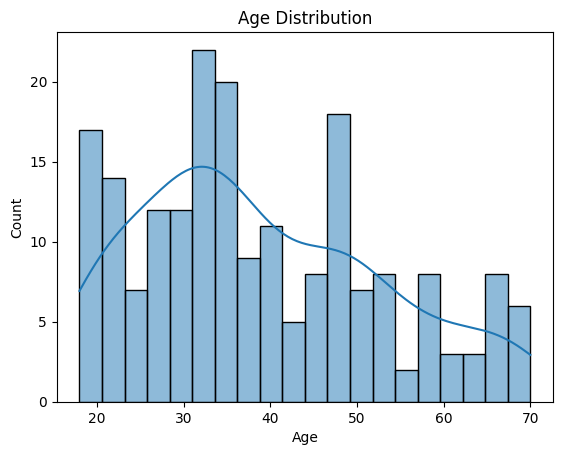

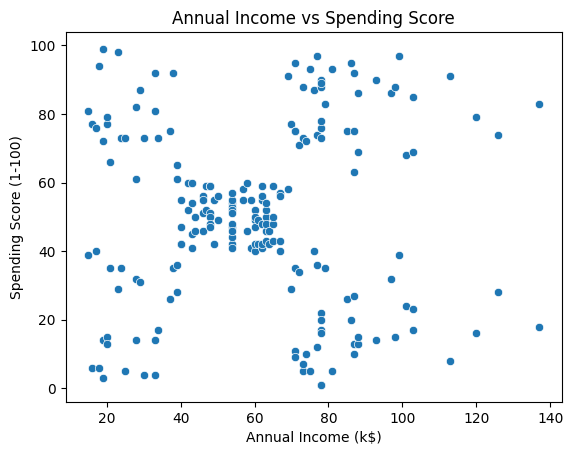

In [3]:
df.info()
df.describe()

# Basic visualizations
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()


In [4]:
# Use Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


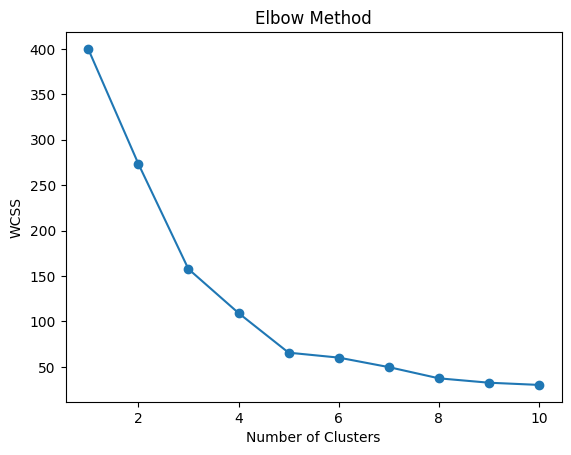

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [6]:
# Choose number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster column to dataframe
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


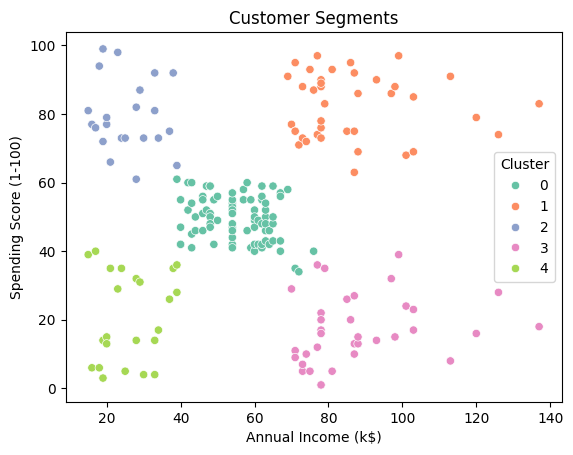

In [7]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df)
plt.title("Customer Segments")
plt.show()


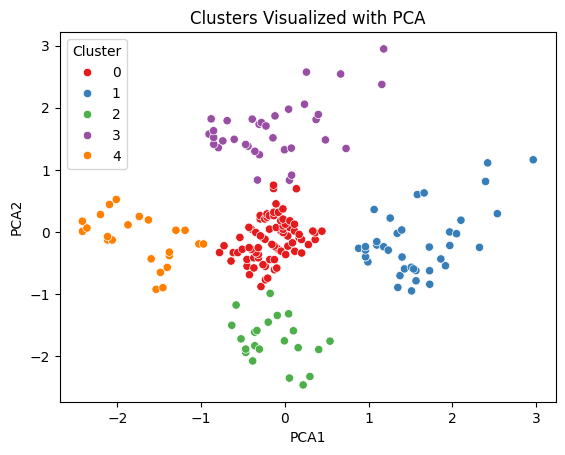

In [8]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df)
plt.title("Clusters Visualized with PCA")
plt.show()


In [9]:
# Group analysis
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Example strategies
strategies = {
    0: "Young high spenders - target with premium offers",
    1: "Older low spenders - maintain with loyalty programs",
    2: "Middle income moderate spenders - upsell opportunities",
    3: "High income low spenders - target with luxury promotions",
    4: "Budget-conscious customers - offer discounts and bundles"
}

for cluster, strategy in strategies.items():
    print(f"Cluster {cluster}: {strategy}")


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043
Cluster 0: Young high spenders - target with premium offers
Cluster 1: Older low spenders - maintain with loyalty programs
Cluster 2: Middle income moderate spenders - upsell opportunities
Cluster 3: High income low spenders - target with luxury promotions
Cluster 4: Budget-conscious customers - offer discounts and bundles
